In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_rows', 20000)
pd.set_option('display.max_columns', 20000)
pd.set_option('display.max_colwidth', -1)
import warnings
warnings.filterwarnings("ignore")

<ipython-input-2-801261649657>:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## PRIMERA PARTE: ARMAR LOS DATAFRAMES QUE ME SIRVEN

COMO QUEREMOS VER CÓMO SE COMPORTAN LA DESVIACION Y LA MEDIA EN GENERAL, O SEA INDEPENDIENTEMENTE SI TOMAMOS LOS PUNTOS DE NICOLAS, DE JUAN PABLO O DE DIEGO, VAMOS A CONCATENAR LOS DATAFRAMES QUE YA TENÍAMOS PARA GENERAR TRES DATAFRAMES NUEVOS. UNO EN EL QUE TENGAMOS LOS DATOS DE MNDWI, OTRO PARA NDWI Y UN ÚLTIMO EN DONDE TENGAMOS TODOS LOS DATOS QUE NOS PUEDE LLEGAR A SERVIR MAS ADELANTE. 

*A TODOS LOS DATAFRAMES QUE LEEMOS PRIMERO, LOS VAMOS A LLAMAR DATAFRAMES BASE DE AHORA EN ADELANTE*

In [ ]:
directoriosancor="/home/manuela/sancor-2.0/" #MANU
#directoriosancor="/home/estefania/Desktop/sancor-2.0/"   #EDU

directoriostdmean=directoriosancor+"1CSV/desviacion-media/"

In [3]:
df_vera_mndwi = pd.read_csv(directoriostdmean+"vera_std_mean_mndwi.csv")
df_vera_ndwi = pd.read_csv(directoriostdmean+"vera_std_mean_ndwi.csv")
df_diego_mndwi = pd.read_csv(directoriostdmean+"diego_std_mean_mndwi.csv")
df_diego_ndwi = pd.read_csv(directoriostdmean+"diego_std_mean_ndwi.csv")
df_nico_mndwi = pd.read_csv(directoriostdmean+"nico_aguanoperm_std_mean_mndwi.csv")
df_nico_ndwi = pd.read_csv(directoriostdmean+"nico_aguanoperm_std_mean_ndwi.csv")

GENERAMOS LISTAS PARA AGREGARLES DOS COLUMNAS A CADA UNO DE LOS DATAFRAMES BASE. UNA EN LA QUE FIGURE EL LUGAR DEL CUAL ES EL DATO Y OTRA EN LA QUE FIGURE DE QUÉ INDICE SE TRATA

In [4]:
indice_mndwi_vera = []
for i in range(len(df_vera_mndwi.anio)):
    indice_mndwi_vera.append("mndwi")

indice_ndwi_vera = []
for i in range(len(df_vera_ndwi.anio)):
    indice_ndwi_vera.append("ndwi")
    
indice_mndwi_diego = []
for i in range(len(df_diego_mndwi.anio)):
    indice_mndwi_diego.append("mndwi")
    
indice_ndwi_diego = []
for i in range(len(df_diego_ndwi.anio)):
    indice_ndwi_diego.append("ndwi")
    
indice_mndwi_nico = []
for i in range(len(df_nico_mndwi.anio)):
    indice_mndwi_nico.append("mndwi")
    
indice_ndwi_nico = []
for i in range(len(df_nico_ndwi.anio)):
    indice_ndwi_nico.append("ndwi")

In [5]:
vera = []
for i in range(len(df_vera_mndwi.anio)):
    vera.append("vera")

diego = []
for i in range(len(df_diego_mndwi.anio)):
    diego.append("diego")
    
nico = []
for i in range(len(df_nico_mndwi.anio)):
    nico.append("nico")

LES AGREGAMOS LAS COLUMNAS QUE DIJIMOS ARRIBA, CONCATENAMOS Y OBTENEMOS LOS DATAFRAMES QUE QUERÍAMOS

In [6]:
df_vera_mndwi["indice"] = indice_mndwi_vera
df_vera_mndwi["lugar"] = vera
df_vera_ndwi["indice"] = indice_ndwi_vera
df_vera_ndwi["lugar"] = vera

df_diego_mndwi["indice"] = indice_mndwi_diego
df_diego_mndwi["lugar"] = diego
df_diego_ndwi["indice"] = indice_ndwi_diego
df_diego_ndwi["lugar"] = diego

df_nico_mndwi["indice"] = indice_mndwi_nico
df_nico_mndwi["lugar"] = nico
df_nico_ndwi["indice"] = indice_ndwi_nico
df_nico_ndwi["lugar"] = nico

In [7]:
df_ndwi = pd.concat([df_vera_ndwi,df_diego_ndwi, df_nico_ndwi])
df_mndwi = pd.concat([df_vera_mndwi,df_diego_mndwi, df_nico_mndwi])
df_completo = pd.concat([df_vera_mndwi,df_diego_mndwi, df_nico_mndwi, df_vera_ndwi,df_diego_ndwi, df_nico_ndwi])

## SEGUNDA PARTE: VER CÓMO SE COMPORTAN LA MEDIA Y LA DESVIACIÓN

VAMOS A AGARRAR LOS DATAFRAMES POR INDICE Y VAMOS A OBTENER NUEVOS DATAFRAMES REORDENANDO LAS FILAS DE LOS ANTERIORES. HACEMOS DOS REORDENAMIENTOS: UNO EN EL CUAL ORDENAMOS DE MENOR A MAYOR LA COLUMNA DE LA MEDIA Y OTRO QUE HACEMOS LO MISMO PERO PARA LA COLUMNA DE LA DESVIACION.

ESTO NOS VA A SERVIR SOLO CUANDO VEAMOS LOS PERCENTILES PARA PODER VER QUÉ TAN LEJOS QUEDAN LAS ÚLTIMAS FILAS DEL ÚLTIMO PERCENTIL QUE TOMEMOS (ABAJO CUANDO LO VEAMOS CREO QUE SE VA A ENTENDER MEJOR)

In [12]:
df_ndwi_ordenado_media = df_ndwi.sort_values('media')
df_mndwi_ordenado_media = df_mndwi.sort_values('media')
df_ndwi_ordenado_desv = df_ndwi.sort_values('desviacion')
df_mndwi_ordenado_desv = df_mndwi.sort_values('desviacion')

## 2.1 MEDIA PARA NDWI

#### VEAMOS LOS DECILES:

In [13]:
df_ndwi.media.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

0.1   -0.533429
0.2   -0.520848
0.3   -0.510682
0.4   -0.501108
0.5   -0.490237
0.6   -0.476561
0.7   -0.457838
0.8   -0.432679
0.9   -0.367715
Name: media, dtype: float64

EL 90% DE LOS DATOS QUEDA POR DEBAJO DE -0.36. VEMOS ENTONCES QUÉ TAN LEJOS DE -0.36 QUEDAN LOS DATOS QUE ESTÁN EN EL ÚLTIMO DECIL:

*si modificamos los percentiles tenemos que acordarnos de modificar el 0.1 de la próxima celda*

*hay hecho un head porque si no es un perno pero para ver los datos mas lejanos lo sacamos al head y ya*

In [14]:
df_ndwi_ordenado_media.iloc[len(df_ndwi) - int(0.1*len(df_ndwi)):len(df_ndwi)].head()

,Unnamed: 0,anio,id,desviacion,media,k,indice,lugar
1161,0,2011,38,0.042001,-0.367639,5,ndwi,diego
714,0,2014,23,0.059292,-0.367364,5,ndwi,vera
767,0,2017,25,0.117013,-0.367248,3,ndwi,vera
2495,0,2015,83,0.113670,-0.367188,1,ndwi,diego
635,0,2015,21,0.067034,-0.366809,1,ndwi,nico


VEMOS QUE HAY DATOS MUY LEJANOS A -0.36. CONSIDEREMOS QUE TODO LO QUE ESTÁ POR ENCIMA DE -0.1 ES "LEJOS" Y VEAMOS CUÁNTOS DATOS CUMPLEN ESO:

In [49]:
len(df_ndwi_ordenado_media[df_ndwi_ordenado_media.media>-0.1])

148

In [50]:
(len(df_ndwi_ordenado_media[df_ndwi_ordenado_media.media>-0.1])/len(df_ndwi_ordenado_media.media))*100

2.6958105646630237

In [51]:
(len(df_ndwi_ordenado_media[df_ndwi_ordenado_media.media>-0.1])/len(df_ndwi_ordenado_media[df_ndwi_ordenado_media.media > - 0.367715]))*100

26.958105646630237

SOLO EL 2.7% DE NUESTROS DATOS NOS QUEDAN "LEJOS PARA ARRIBA" A -0.36 QUE REPRESENTAN UN 26.96% DE LOS DATOS DEL ÚLTIMO DECIL

AHORA VEAMOS LO MISMO PERO TOMANDO LA MEDIA DE LAS MEDIAS +/- UNA DESVIACIÓN ESTÁNDAR

In [18]:
med_ndwi = df_ndwi_ordenado_media.media.mean()
desv_ndwi = df_ndwi_ordenado_media.media.std()
med_mas_desv_ndwi = df_ndwi_ordenado_media.media.mean() - df_ndwi_ordenado_media.media.std()
med_men_desv_ndwi = df_ndwi_ordenado_media.media.mean() + df_ndwi_ordenado_media.media.std()

In [19]:
(len(df_ndwi_ordenado_media[df_ndwi_ordenado_media.media<med_mas_desv_ndwi])/len(df_ndwi_ordenado_media.media))*100

0.07285974499089254

In [20]:
(len(df_ndwi_ordenado_media[df_ndwi_ordenado_media.media>med_men_desv_ndwi])/len(df_ndwi_ordenado_media.media))*100

7.122040072859745

EL 0.07% DE LOS DATOS ME QUEDAN POR DEBAJO DE LA MEDIA MENOS LA DESVIACIÓN ESTÁNDAR Y EL 7% DE LOS DATOS ME QUEDA POR ARRIBA DE LA MEDIA MAS LA DESVIACIÓN ESTÁNDAR.

SON MUY POQUITOS DATOS. SIN EMBARGO, LO QUE PODEMOS PENSAR ES DE DÓNDE PROVIENEN ESOS DATOS (DE QUÉ LUGAR SON) Y QUÉ TAN LEJOS ESTÁN DE LOS OTROS DATOS. (PENSANDO EN LOS DEL ÚLTIMO DECIL).

VEAMOS PRIMERO LA PROBABILIDAD DE SER DE CADA UNO DE LOS LUGARES:

*RECORDEMOS QUE DE DIEGO TENEMOS 100 PUNTOS, DE NICOLAS 30 Y DE JUAN PABLO 54. ES DECIR, EL 54% DE LOS DATOS SON DE DIEGO, EL 16% DE LOS DATOS SON DE NICOLAS Y EL 29% SON DE JUAN PABLO*

In [21]:
c = df_ndwi_ordenado_media.iloc[len(df_ndwi) - int(0.1*len(df_ndwi)):len(df_ndwi)]

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE DIEGO:

In [22]:
len(c[c.lugar == "diego"])/len(c)*100

37.15846994535519

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE JUAN PABLO:

In [23]:
len(c[c.lugar == "vera"])/len(c)*100

53.00546448087432

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE NICOLAS:

In [24]:
len(c[c.lugar == "nico"])/len(c)*100

9.836065573770492

LA MITAD DE LOS DATOS DEL ÚLTIMO DECIL SON DE JUAN PABLO

VEAMOS AHORA QUÉ TAN LEJOS ESTÁN LOS DATOS DEL ÚLTIMO DECIL:

LA MEDIA MÍNIMA ES -0.591742 Y LAS MEDIAS DEL ÚLTIMO DECIL ESTÁN EN EL RANGO DE -0.367715 A 0.729576. 

ES DECIR, EN LOS PRIMEROS 9 DECILES SALTA 0,224027 Y EN EL ÚLTIMO DECIL SALTA 1,097291

¿PODRÍAMOS PENSAR ENTONCES QUE MUCHOS DE LOS QUE ESTÁN EN EL ÚLTIMO DECIL SON EFECTIVAMENTE OUTLIERS?

## 2.2 MEDIA PARA MNDWI

#### VEAMOS LOS DECILES

In [25]:
df_mndwi.media.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

0.1   -0.565717
0.2   -0.557381
0.3   -0.550352
0.4   -0.542192
0.5   -0.531051
0.6   -0.507557
0.7   -0.471718
0.8   -0.431930
0.9   -0.384414
Name: media, dtype: float64

EL 90% DE LOS DATOS QUEDA POR DEBAJO DE -0.38. VEMOS ENTONCES QUÉ TAN LEJOS DE -0.38 QUEDAN LOS DATOS QUE ESTÁN EN EL ÚLTIMO DECIL:

*si modificamos los percentiles tenemos que acordarnos de modificar el 0.1 de la próxima celda*

*hay hecho un head porque si no es un perno pero para ver los datos mas lejanos lo sacamos al head y ya*

In [26]:
df_mndwi_ordenado_media.iloc[len(df_mndwi) - int(0.1*len(df_mndwi)):len(df_mndwi)].head()

,Unnamed: 0,anio,id,desviacion,media,k,indice,lugar
600,0,2010,20,0.079774,-0.384268,1,mndwi,nico
1386,0,2016,46,0.161907,-0.383742,1,mndwi,vera
424,0,2014,14,0.059685,-0.383678,1,mndwi,vera
935,0,2015,31,0.093488,-0.383584,1,mndwi,vera
1142,0,2012,38,0.020512,-0.383522,1,mndwi,diego


VEMOS QUE HAY DATOS MUY LEJANOS A -0.38. AL IGUAL QUE ANTES, VAMOS A CONSIDERAR QUE TODO LO QUE ESTÁ POR ENCIMA DE -0.1 ES "LEJOS" Y VAMOS A VER CUÁNTOS DATOS CUMPLEN ESO. TAMBIÉN VAMOS A CONSIDERAR LO MISMO PERO TOMANDO LA MEDIA DE LAS MEDIAS +/- UNA DESVIACIÓN ESTÁNDAR

In [45]:
(len(df_mndwi_ordenado_media[df_mndwi_ordenado_media.media>-0.1])/len(df_mndwi_ordenado_media.media))*100

2.3861566484517307

In [46]:
(len(df_mndwi_ordenado_media[df_mndwi_ordenado_media.media>-0.1])/len(df_mndwi_ordenado_media[df_mndwi_ordenado_media.media > -0.384414]))*100

23.861566484517304

In [29]:
med_mndwi = df_mndwi_ordenado_media.media.mean()
desv_mndwi = df_mndwi_ordenado_media.media.std()
med_mas_desv_mndwi = df_mndwi_ordenado_media.media.mean() - df_mndwi_ordenado_media.media.std()
med_men_desv_mndwi = df_mndwi_ordenado_media.media.mean() + df_mndwi_ordenado_media.media.std()

In [30]:
(len(df_mndwi_ordenado_media[df_mndwi_ordenado_media.media<med_mas_desv_mndwi])/len(df_mndwi_ordenado_media.media))*100

0.0

In [31]:
(len(df_mndwi_ordenado_media[df_mndwi_ordenado_media.media>med_men_desv_mndwi])/len(df_mndwi_ordenado_media.media))*100

7.267759562841531

SOLO EL 2.38% DE NUESTROS DATOS NOS QUEDAN "LEJOS PARA ARRIBA" A -0.38 QUE REPRESENTAN UN 23.86% DE LOS DATOS DEL ÚLTIMO DECIL

NINGUNO DE LOS DATOS ME QUEDA POR DEBAJO DE LA MEDIA MENOS LA DESVIACIÓN ESTÁNDAR Y EL 7% DE LOS DATOS ME QUEDA POR ARRIBA DE LA MEDIA MAS LA DESVIACIÓN ESTÁNDAR.

SON MUY POQUITOS DATOS. SIN EMBARGO, LO QUE PODEMOS PENSAR ES DE DÓNDE PROVIENEN ESOS DATOS (DE QUÉ LUGAR SON) Y QUÉ TAN LEJOS ESTÁN DE LOS OTROS DATOS. (PENSANDO EN LOS DEL ÚLTIMO DECIL).

VEAMOS PRIMERO LA PROBABILIDAD DE SER DE CADA UNO DE LOS LUGARES.

*RECORDEMOS QUE DE DIEGO TENEMOS 100 PUNTOS, DE NICOLAS 30 Y DE JUAN PABLO 54. ES DECIR, EL 54% DE LOS DATOS SON DE DIEGO, EL 16% DE LOS DATOS SON DE NICOLAS Y EL 29% SON DE JUAN PABLO*

In [32]:
d = df_mndwi_ordenado_media.iloc[len(df_mndwi) - int(0.1*len(df_mndwi)):len(df_mndwi)]

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE DIEGO:

In [33]:
len(d[d.lugar == "diego"])/len(d)*100

25.683060109289617

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE JUAN PABLO:

In [34]:
len(d[d.lugar == "vera"])/len(d)*100

65.93806921675774

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE NICOLAS:

In [35]:
len(d[d.lugar == "nico"])/len(d)*100

8.378870673952642

EL 65% DE LOS DATOS DEL ÚLTIMO DECIL SON DE JUAN PABLO. AL IGUAL QUE PARA EL CASO DEL NDWI, LA MAYOR PARTE DE LOS DATOS QUE ESTÁN FUERA DE LO NORMAL, SON DE VERA.

VEAMOS AHORA QUÉ TAN LEJOS ESTÁN LOS DATOS DEL ÚLTIMO DECIL:

LA MEDIA MÍNIMA ES -0.614567 Y LAS MEDIAS DEL ÚLTIMO DECIL ESTÁN EN EL RANGO DE -0.384414 A 0.746975. 

ES DECIR, EN LOS PRIMEROS 9 DECILES SALTA 0,230153 Y EN EL ÚLTIMO DECIL SALTA 1,361542

¿PODRÍAMOS PENSAR ENTONCES QUE MUCHOS DE LOS QUE ESTÁN EN EL ÚLTIMO DECIL SON EFECTIVAMENTE OUTLIERS?

AHORA BIEN, UNA PRIMERA CONCLUSIÓN PODRÍA SER QUE EL ESTADÍSTICO MEDIA CALCULADO POR AÑO SE COMPORTA MUY SIMILAR EN EL ÍNDICE NDWI Y MNDWI

## 2.3 DESVIACIÓN PARA NDWI

#### VEAMOS LOS DECILES

In [36]:
df_ndwi.desviacion.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

0.1    0.041767
0.2    0.049143
0.3    0.056443
0.4    0.063640
0.5    0.070911
0.6    0.079563
0.7    0.088830
0.8    0.100147
0.9    0.116121
Name: desviacion, dtype: float64

EL 90% DE LOS DATOS QUEDA POR DEBAJO DE 0.11. VEMOS ENTONCES QUÉ TAN LEJOS DE 0.11 QUEDAN LOS DATOS QUE ESTÁN EN EL ÚLTIMO DECIL:

*si modificamos los percentiles tenemos que acordarnos de modificar el 0.1 de la próxima celda*

*hay hecho un head porque si no es un perno pero para ver los datos mas lejanos lo sacamos al head y ya*

In [44]:
df_ndwi_ordenado_desv.iloc[len(df_ndwi) - int(0.1*len(df_ndwi)):len(df_ndwi)].head()

,Unnamed: 0,anio,id,desviacion,media,k,indice,lugar
430,0,2010,14,0.116216,-0.556999,3,ndwi,nico
1540,0,2010,51,0.116418,0.130247,3,ndwi,vera
60,0,2010,2,0.116430,-0.532455,1,ndwi,diego
467,0,2017,15,0.116431,-0.325002,3,ndwi,vera
1444,0,2014,48,0.116522,-0.498292,1,ndwi,diego


VEMOS QUE HAY DATOS MUY LEJANOS A 0.11. AL IGUAL QUE ANTES, VAMOS A CONSIDERAR QUE TODO LO QUE ESTÁ POR ENCIMA DE 0.15 ES "LEJOS" Y VAMOS A VER CUÁNTOS DATOS CUMPLEN ESO. 

TAMBIÉN VAMOS A CONSIDERAR LO MISMO PERO TOMANDO LA MEDIA DE LAS DESVIACIONES +/- UNA DESVIACIÓN ESTÁNDAR

In [53]:
(len(df_ndwi_ordenado_desv[df_ndwi_ordenado_desv.desviacion>0.15])/len(df_ndwi_ordenado_desv.desviacion))*100

3.989071038251366

In [54]:
(len(df_ndwi_ordenado_desv[df_ndwi_ordenado_desv.desviacion>0.15])/len(df_ndwi_ordenado_desv[df_ndwi_ordenado_desv.desviacion > 0.116121]))*100

39.89071038251366

In [56]:
med_desv_ndwi = df_ndwi_ordenado_desv.desviacion.mean()
desv_desv_ndwi = df_ndwi_ordenado_desv.desviacion.std()
med_mas_desv_desv_ndwi = med_desv_ndwi + desv_desv_ndwi
med_men_desv_desv_ndwi = med_desv_ndwi - desv_desv_ndwi

In [57]:
(len(df_ndwi_ordenado_desv[df_ndwi_ordenado_desv.desviacion<med_men_desv_desv_ndwi])/len(df_ndwi_ordenado_desv.desviacion))*100

8.269581056466302

In [59]:
(len(df_ndwi_ordenado_desv[df_ndwi_ordenado_desv.desviacion>med_mas_desv_desv_ndwi])/len(df_ndwi_ordenado_desv.desviacion))*100

10.091074681238615

SOLO EL 3.99% DE NUESTROS DATOS NOS QUEDAN "LEJOS PARA ARRIBA" A 0.11 QUE REPRESENTAN UN 39.89% DE LOS DATOS DEL ÚLTIMO DECIL

EL 8.27% DE LOS DATOS ME QUEDA POR DEBAJO DE LA MEDIA MENOS LA DESVIACIÓN ESTÁNDAR Y EL 10% DE LOS DATOS ME QUEDA POR ARRIBA DE LA MEDIA MAS LA DESVIACIÓN ESTÁNDAR.

TAMBIÉN LO QUE PODEMOS PENSAR ES DE DÓNDE PROVIENEN ESOS DATOS (DE QUÉ LUGAR SON) Y QUÉ TAN LEJOS ESTÁN DE LOS OTROS DATOS. (PENSANDO EN LOS DEL ÚLTIMO DECIL).

VEAMOS PRIMERO LA PROBABILIDAD DE SER DE CADA UNO DE LOS LUGARES.

*RECORDEMOS QUE DE DIEGO TENEMOS 100 PUNTOS, DE NICOLAS 30 Y DE JUAN PABLO 54. ES DECIR, EL 54% DE LOS DATOS SON DE DIEGO, EL 16% DE LOS DATOS SON DE NICOLAS Y EL 29% SON DE JUAN PABLO*

In [60]:
e = df_ndwi_ordenado_desv.iloc[len(df_ndwi) - int(0.1*len(df_ndwi)):len(df_ndwi)]

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE DIEGO:

In [61]:
len(e[e.lugar == "diego"])/len(e)*100

33.33333333333333

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE JUAN PABLO:

In [62]:
len(e[e.lugar == "vera"])/len(e)*100

47.540983606557376

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE NICOLAS:

In [63]:
len(e[e.lugar == "nico"])/len(e)*100

19.12568306010929

EL 47% DE LOS DATOS DEL ÚLTIMO DECIL SON DE JUAN PABLO

VEAMOS AHORA QUÉ TAN LEJOS ESTÁN LOS DATOS DEL ÚLTIMO DECIL:

LA DESVIACION MÍNIMA ES 0.015088 Y LAS DESVIACIONES DEL ÚLTIMO DECIL ESTÁN EN EL RANGO DE 0.116121 A 0.454466. 

ES DECIR, EN LOS PRIMEROS 9 DECILES SALTA 0.101033 Y EN EL ÚLTIMO DECIL SALTA 0.338345

¿PODRÍAMOS PENSAR ENTONCES QUE MUCHOS DE LOS QUE ESTÁN EN EL ÚLTIMO DECIL SON EFECTIVAMENTE OUTLIERS?

## 2.4 DESVIACIÓN PARA MNDWI

#### VEAMOS LOS DECILES

In [27]:
df_mndwi.desviacion.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

0.1    0.024675
0.2    0.029408
0.3    0.033616
0.4    0.037816
0.5    0.042499
0.6    0.048396
0.7    0.057996
0.8    0.073115
0.9    0.102233
Name: desviacion, dtype: float64

EL 90% DE LOS DATOS QUEDA POR DEBAJO DE 0.10. VEMOS ENTONCES QUÉ TAN LEJOS DE 0.10 QUEDAN LOS DATOS QUE ESTÁN EN EL ÚLTIMO DECIL:

*si modificamos los percentiles tenemos que acordarnos de modificar el 0.1 de la próxima celda*

*hay hecho un head porque si no es un perno pero para ver los datos mas lejanos lo sacamos al head y ya*

In [69]:
df_mndwi_ordenado_desv.iloc[len(df_mndwi) - int(0.1*len(df_mndwi)):len(df_mndwi)].head()

,Unnamed: 0,anio,id,desviacion,media,k,indice,lugar
768,0,2018,25,0.102310,-0.444784,3,mndwi,vera
2724,0,2014,90,0.102313,0.353001,5,mndwi,diego
240,0,2010,8,0.102408,-0.455027,1,mndwi,vera
751,0,2011,25,0.102722,-0.422640,1,mndwi,vera
1579,0,2019,52,0.102725,-0.385096,3,mndwi,vera


VEMOS QUE HAY DATOS MUY LEJANOS A 0.10. AL IGUAL QUE ANTES, VAMOS A CONSIDERAR QUE TODO LO QUE ESTÁ POR ENCIMA DE 0.15 ES "LEJOS" Y VAMOS A VER CUÁNTOS DATOS CUMPLEN ESO. 

TAMBIÉN VAMOS A CONSIDERAR LO MISMO PERO TOMANDO LA MEDIA DE LAS DESVIACIONES +/- UNA DESVIACIÓN ESTÁNDAR

In [70]:
(len(df_mndwi_ordenado_desv[df_mndwi_ordenado_desv.desviacion>0.15])/len(df_mndwi_ordenado_desv.desviacion))*100

3.8069216757741344

In [71]:
(len(df_mndwi_ordenado_desv[df_mndwi_ordenado_desv.desviacion>0.15])/len(df_mndwi_ordenado_desv[df_mndwi_ordenado_desv.desviacion > 0.102233]))*100

38.069216757741344

In [72]:
med_desv_mndwi = df_mndwi_ordenado_desv.desviacion.mean()
desv_desv_mndwi = df_mndwi_ordenado_desv.desviacion.std()
med_mas_desv_desv_mndwi = med_desv_mndwi + desv_desv_mndwi
med_men_desv_desv_mndwi = med_desv_mndwi - desv_desv_mndwi

In [73]:
(len(df_mndwi_ordenado_desv[df_mndwi_ordenado_desv.desviacion<med_men_desv_desv_mndwi])/len(df_mndwi_ordenado_desv.desviacion))*100

0.2185792349726776

In [74]:
(len(df_mndwi_ordenado_desv[df_mndwi_ordenado_desv.desviacion>med_mas_desv_desv_mndwi])/len(df_mndwi_ordenado_desv.desviacion))*100

11.09289617486339

EL 3.8% DE NUESTROS DATOS NOS QUEDAN "LEJOS PARA ARRIBA" A 0.10 QUE REPRESENTAN UN 38.06% DE LOS DATOS DEL ÚLTIMO DECIL

EL 0.2% DE LOS DATOS ME QUEDA POR DEBAJO DE LA MEDIA MENOS LA DESVIACIÓN ESTÁNDAR Y EL 110% DE LOS DATOS ME QUEDA POR ARRIBA DE LA MEDIA MAS LA DESVIACIÓN ESTÁNDAR.

ACÁ HAY UNA DIFERENCIA CON EL ÍNDICE NDWI PUES EN ESE ÍNDICE EL PORCENTAJE DE DATOS QUE QUEDAN POR DEBAJO DE LA MEDIA MENOS LA DESVIACIÓN ES 8%. ESTO SE DIFERENCIA NO SOLO CUANDO ANALIZAMOS LA DESVIACIÓN SINO TAMBIÉN LA MEDIA. 

TAMBIÉN LO QUE PODEMOS PENSAR ES DE DÓNDE PROVIENEN ESOS DATOS (DE QUÉ LUGAR SON) Y QUÉ TAN LEJOS ESTÁN DE LOS OTROS DATOS. (PENSANDO EN LOS DEL ÚLTIMO DECIL).

VEAMOS PRIMERO LA PROBABILIDAD DE SER DE CADA UNO DE LOS LUGARES.

*RECORDEMOS QUE DE DIEGO TENEMOS 100 PUNTOS, DE NICOLAS 30 Y DE JUAN PABLO 54. ES DECIR, EL 54% DE LOS DATOS SON DE DIEGO, EL 16% DE LOS DATOS SON DE NICOLAS Y EL 29% SON DE JUAN PABLO*

In [75]:
f = df_mndwi_ordenado_desv.iloc[len(df_mndwi) - int(0.1*len(df_mndwi)):len(df_mndwi)]

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE DIEGO:

In [76]:
len(f[f.lugar == "diego"])/len(f)*100

28.233151183970858

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE JUAN PABLO:

In [77]:
len(f[f.lugar == "vera"])/len(f)*100

61.384335154826964

PROBABILIDAD DE CAER EN EL ÚLTIMO DECIL Y SER UN DATO DE NICOLAS:

In [78]:
len(f[f.lugar == "nico"])/len(f)*100

10.382513661202186

EL 61% DE LOS DATOS DEL ÚLTIMO DECIL SON DE JUAN PABLO. AL IGUAL QUE PARA EL CASO DEL NDWI, LA MAYOR PARTE DE LOS DATOS QUE ESTÁN FUERA DE LO NORMAL, SON DE VERA.

VEAMOS AHORA QUÉ TAN LEJOS ESTÁN LOS DATOS DEL ÚLTIMO DECIL:

LA DESVIACION MÍNIMA ES 0.012029 Y LAS DESVIACIONES DEL ÚLTIMO DECIL ESTÁN EN EL RANGO DE 0.102233 A 0.469565. 

ES DECIR, EN LOS PRIMEROS 9 DECILES SALTA 0,090204 Y EN EL ÚLTIMO DECIL SALTA 0.367332

¿PODRÍAMOS PENSAR ENTONCES QUE MUCHOS DE LOS QUE ESTÁN EN EL ÚLTIMO DECIL SON EFECTIVAMENTE OUTLIERS?

AHORA BIEN, UNA PRIMERA CONCLUSIÓN PODRÍA SER QUE EL ESTADÍSTICO DESVIACIÓN ESTANDAR CALCULADO POR AÑO SE COMPORTA MUY SIMILAR EN EL ÍNDICE NDWI Y MNDWI

## TERCERA PARTE: GRAFICAR LA DESVIACIÓN Y LA MEDIA PARA EL MNDWI Y EL NDWI

### 3.1 GRÁFICO DE LA MEDIA PARA MNDWI

<Figure size 5040x2880 with 0 Axes>

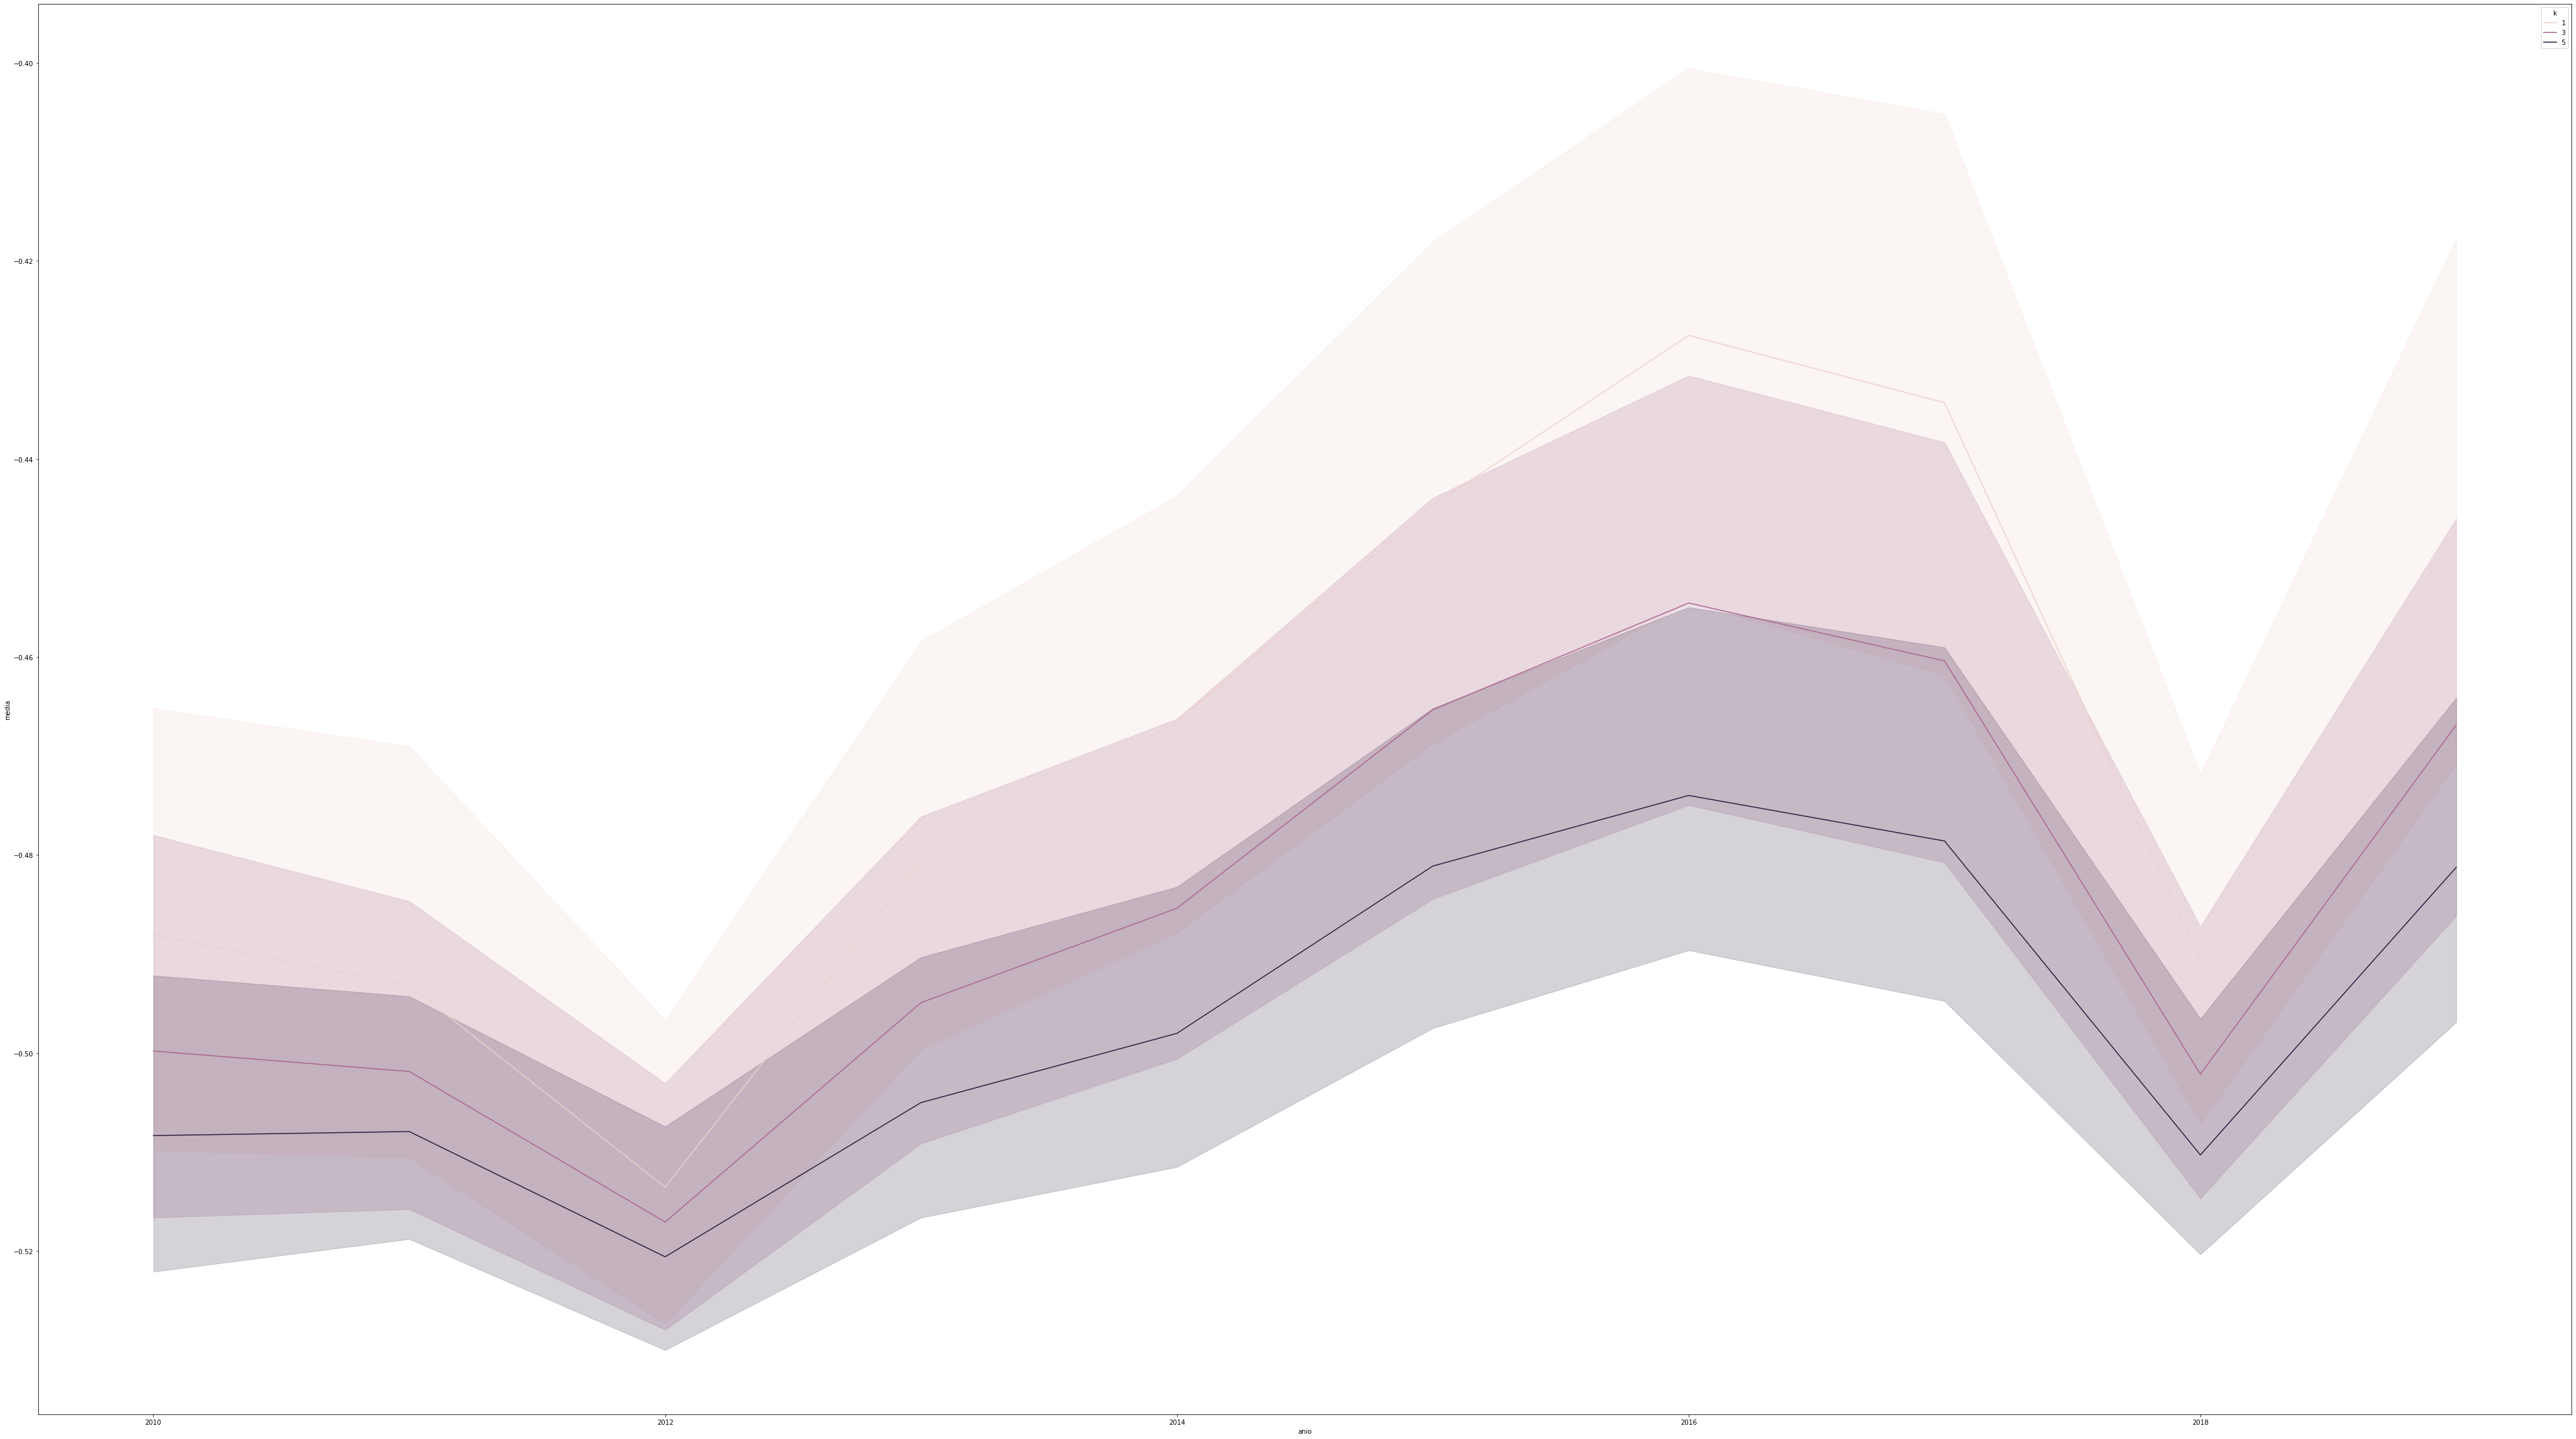

In [8]:
plt.figure(figsize=(70,40))
sns.lineplot(data=df_mndwi, x='anio', y = 'media', hue='k')

### 3.2 GRÁFICO DE LA MEDIA PARA NDWI

<Figure size 5040x2880 with 0 Axes>

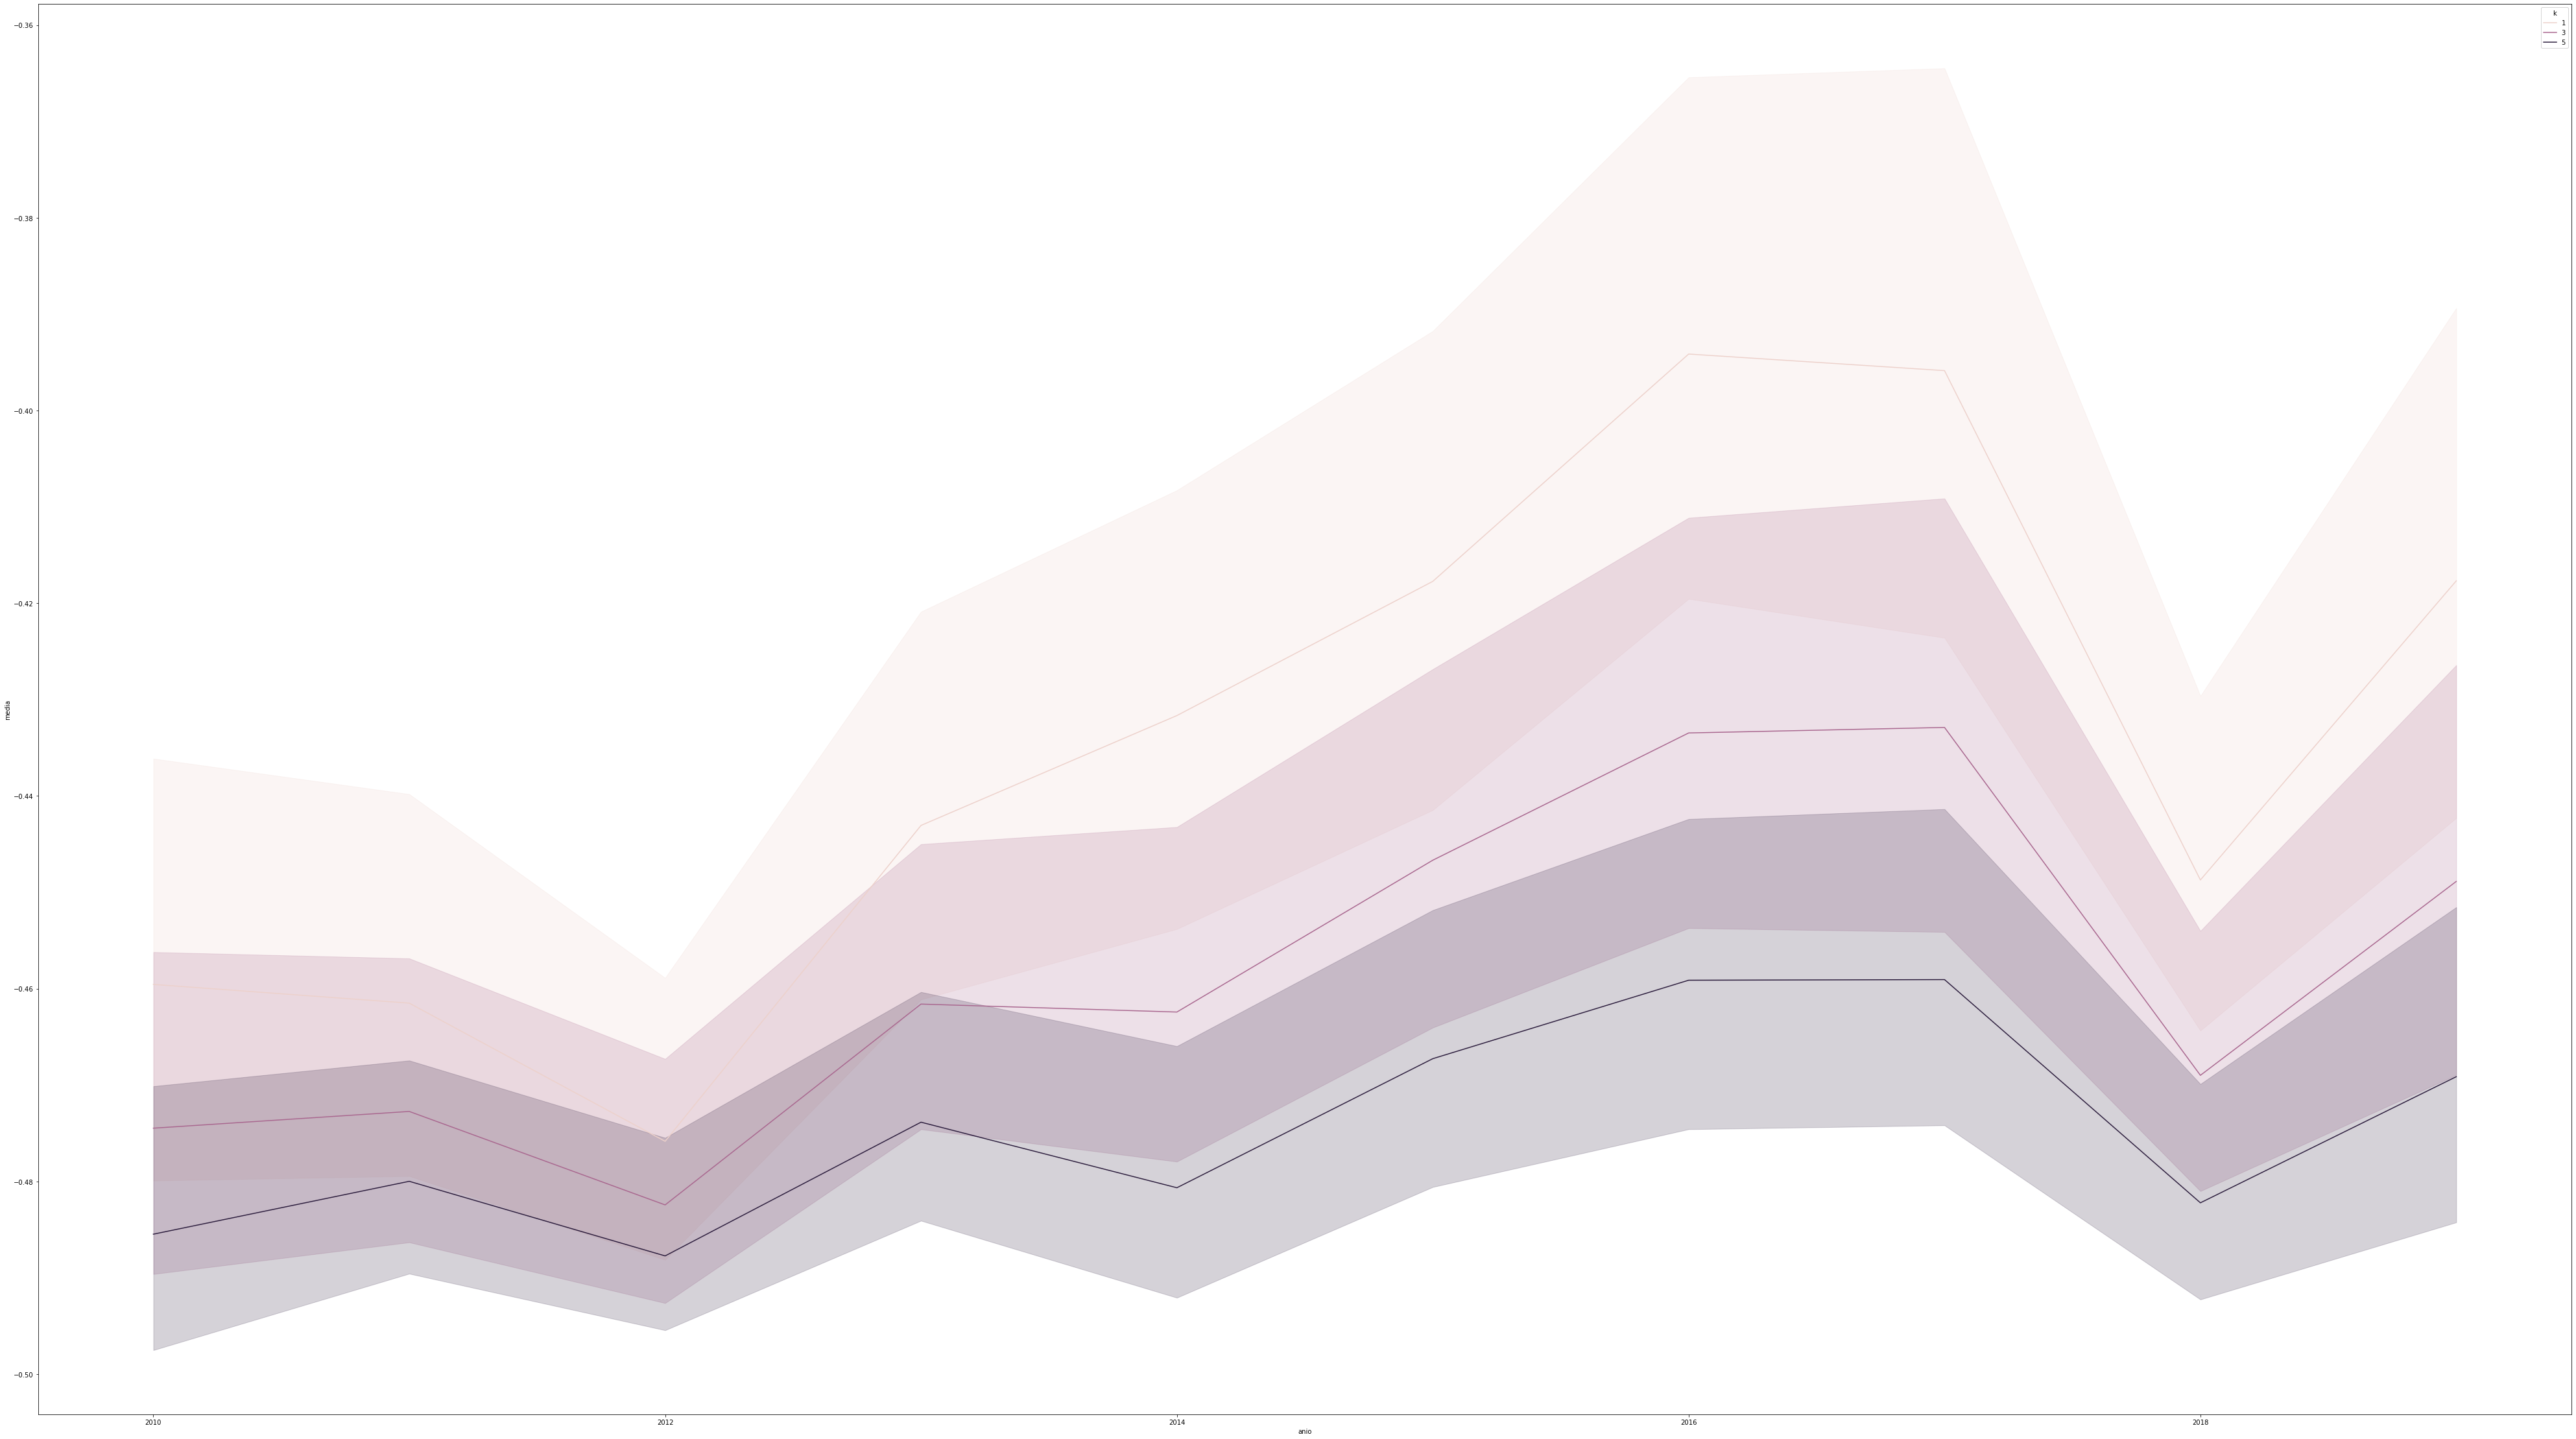

In [9]:
plt.figure(figsize=(70,40))
sns.lineplot(data=df_ndwi, x='anio', y = 'media', hue='k')

### 3.3 GRÁFICO DE LA DESVIACIÓN PARA MNDWI

<Figure size 5040x2880 with 0 Axes>

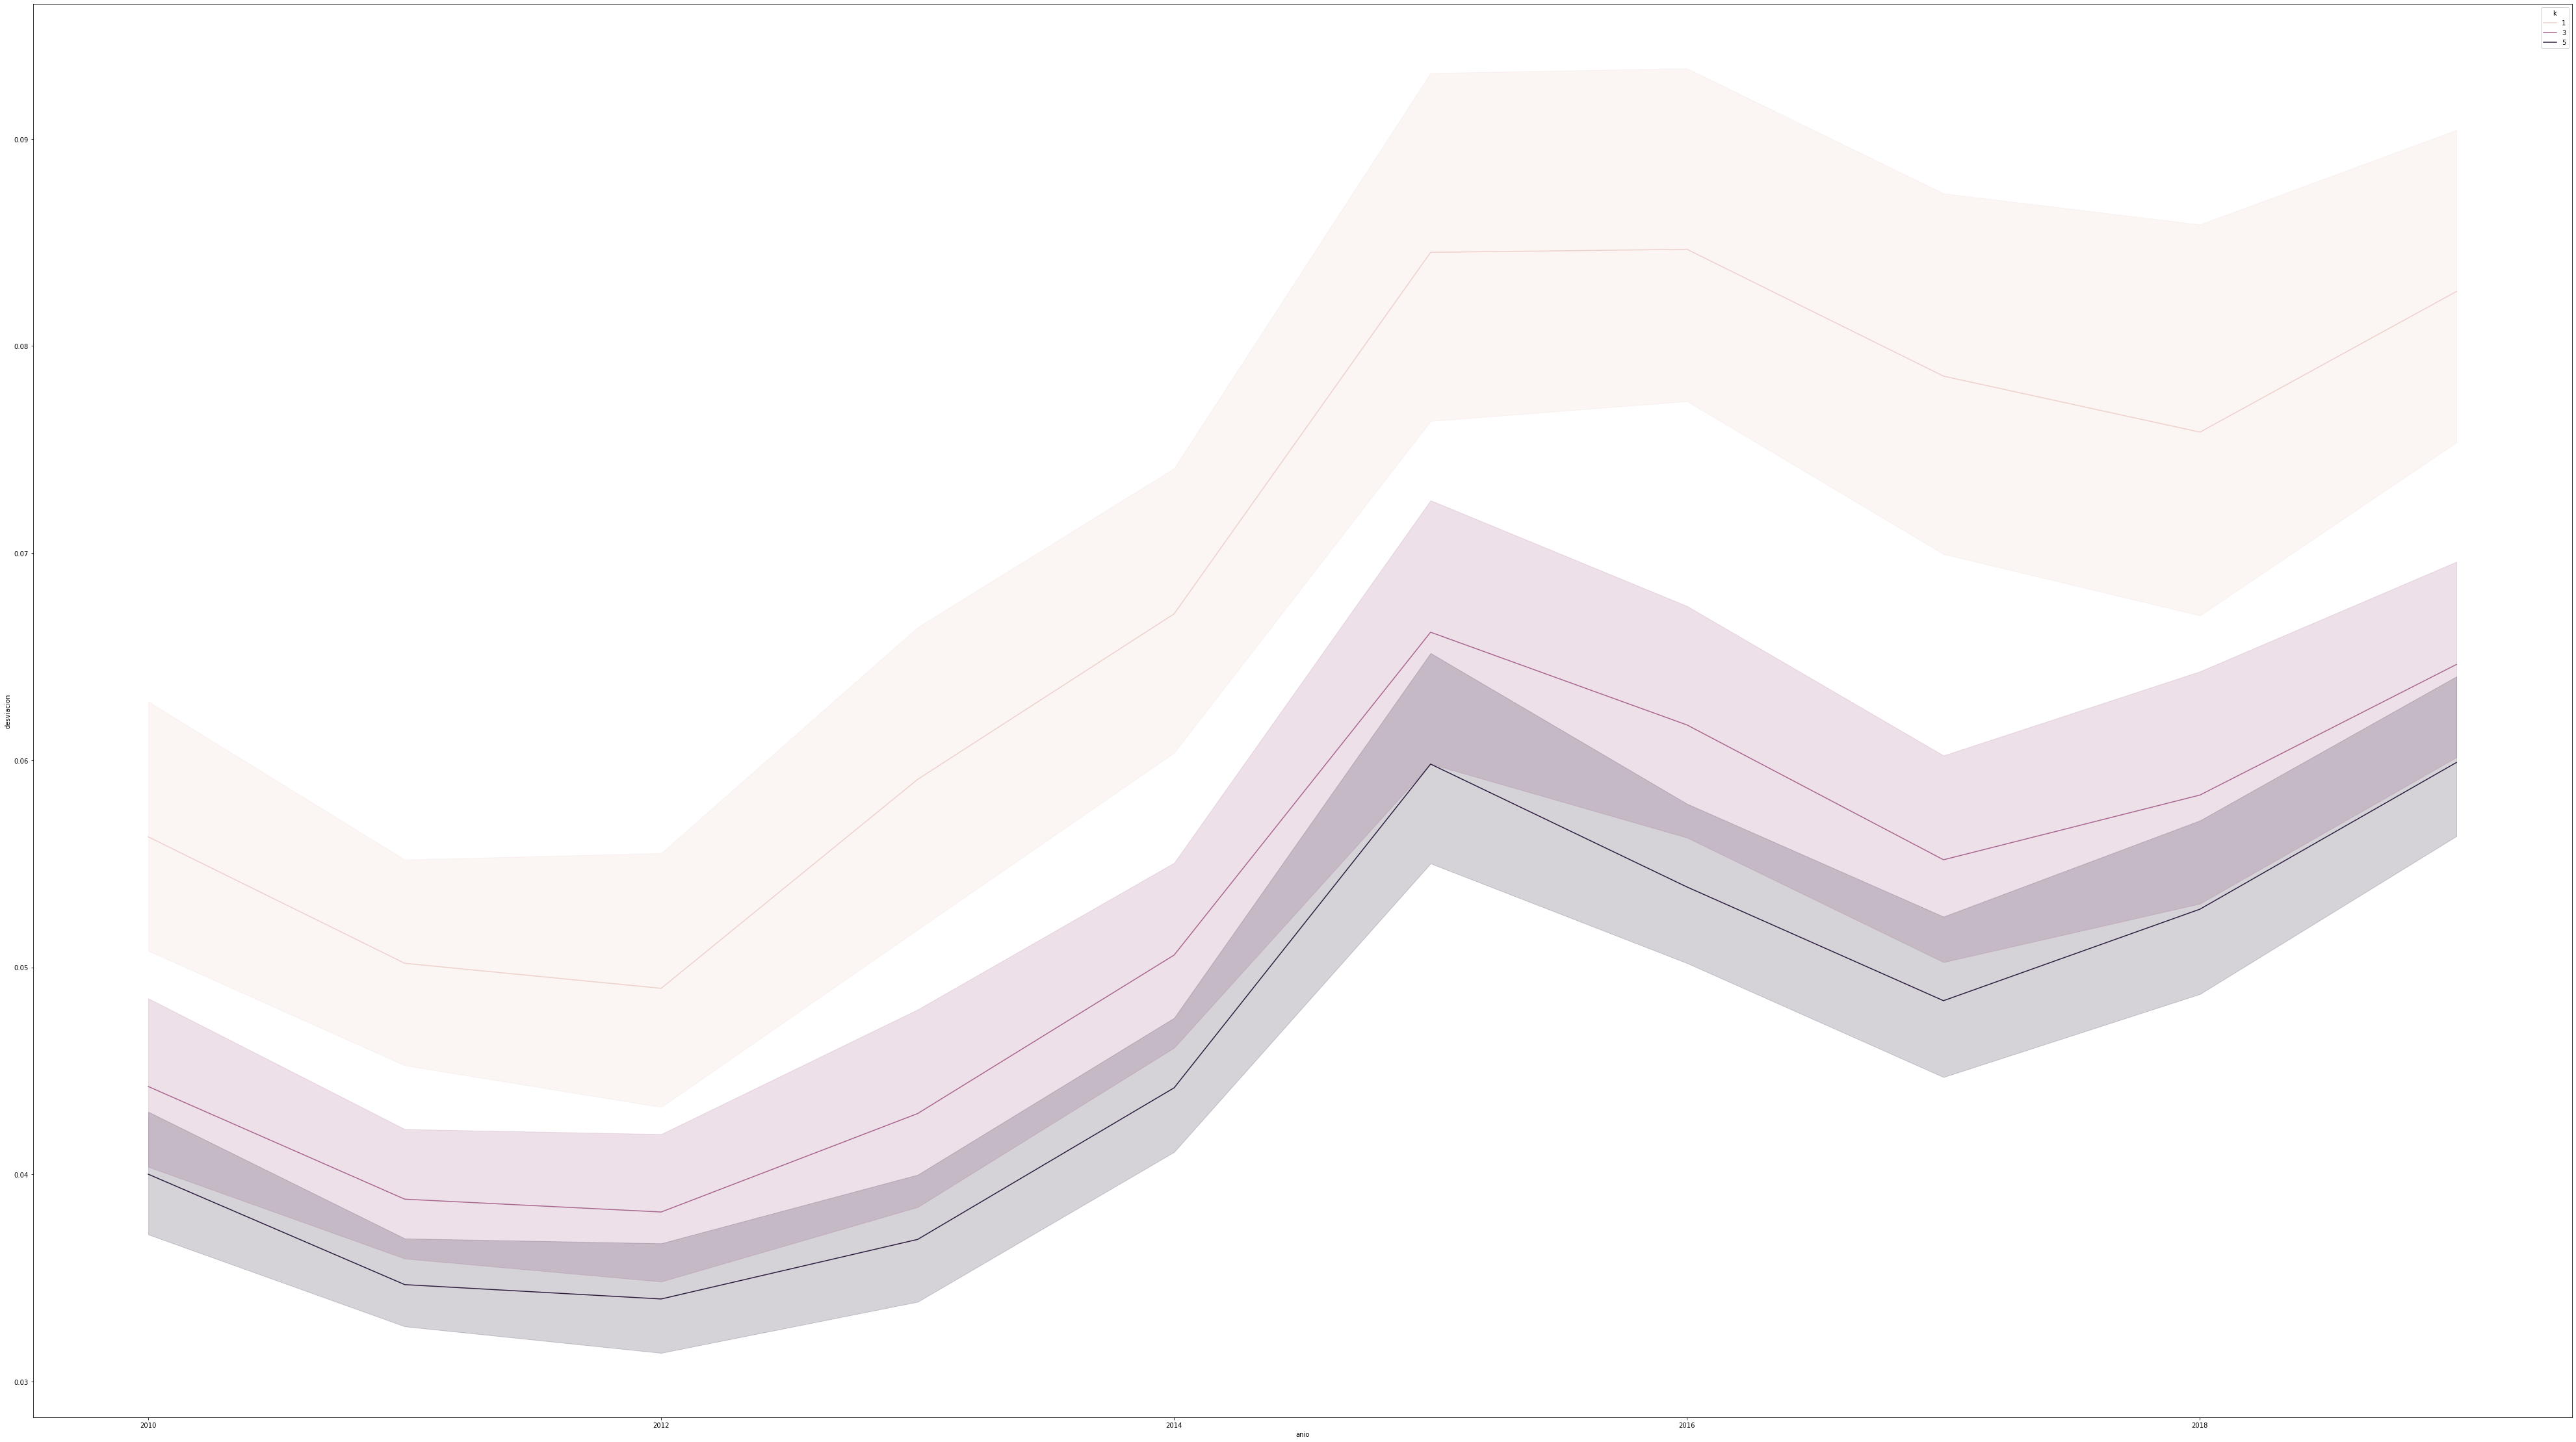

In [10]:
plt.figure(figsize=(70,40))
sns.lineplot(data=df_mndwi, x='anio', y = 'desviacion', hue='k')

### 3.4 GRÁFICO DE LA DESVIACIÓN PARA NDWI

<Figure size 5040x2880 with 0 Axes>

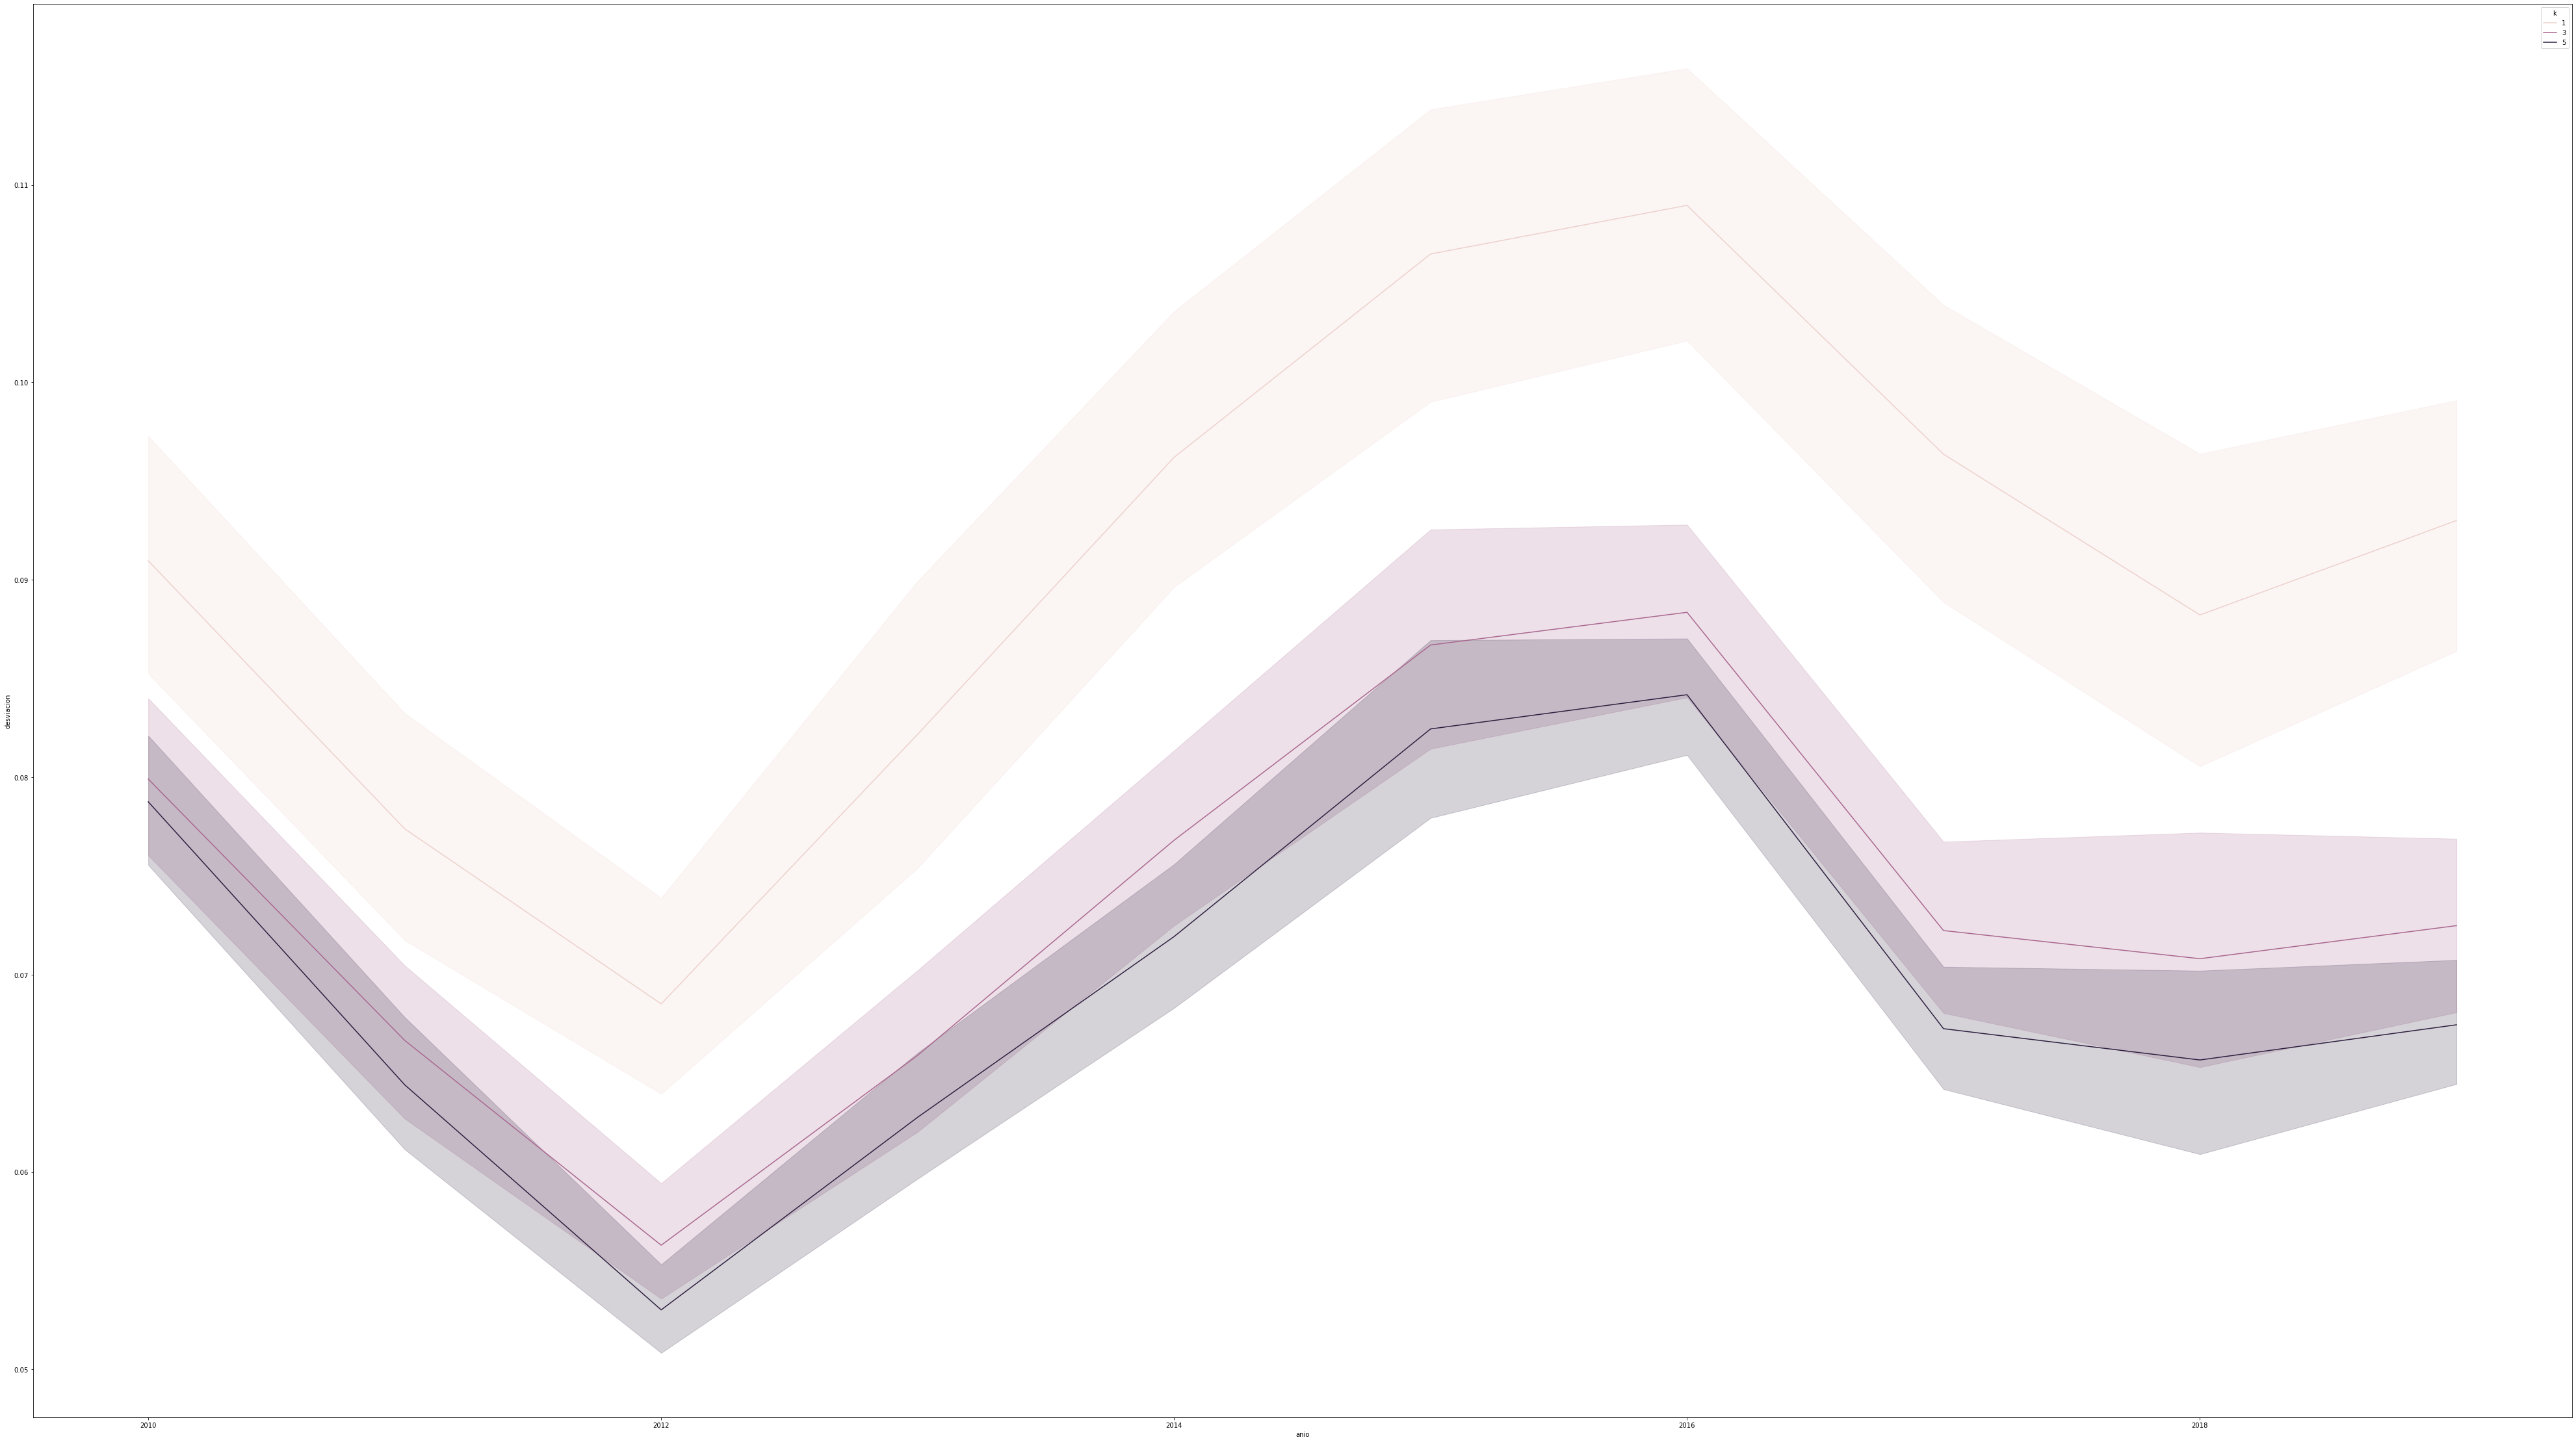

In [11]:
plt.figure(figsize=(70,40))
sns.lineplot(data=df_ndwi, x='anio', y = 'desviacion', hue='k')